#+TITLE: Double Descent
#+CATEGORIES: optimization
#+DESCRIPTION: A phenomena where generalization gets worse then better with larger models, bigger datasets and more training epochs.
#+AUTHORS: Preetum Nakkiran, Gal Kaplun, Yamini Bansal, Tristan Yang, Boaz Barak, Ilya Sutskever
#+SOURCE: https://arxiv.org/abs/1912.02292
#+DATE: 2024-01-31

# Double Descent

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('./deadneuron.mplstyle')

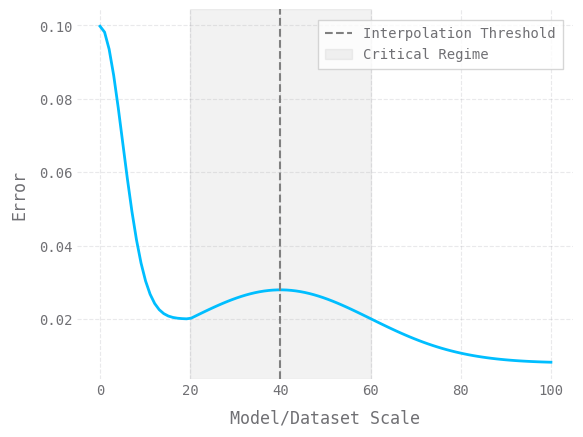

In [250]:
# An approximation of a double descent curve with piecewise gaussians
def gaussian(x, mu, sig):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2))
    
def double_descent(x):
    descent1 = gaussian(x[:20], 0, 5)+0.02
    descent2 = gaussian(x[20:], 40, 20)+0.008
    
    return np.concatenate((descent1, descent2))


x = np.linspace(0, 100, 100)
plt.plot(x, double_descent(x))

plt.axvline(40, color='grey', linestyle='--', linewidth='1.5', label="Interpolation Threshold")
plt.axvspan(20, 60, alpha=0.1, color='grey', label='Critical Regime')

plt.xlabel('Model/Dataset Scale')
plt.ylabel('Error')

plt.legend()
plt.show()